Homework is due September 11th at 6:30 PM sharp. Anything submitted after that will receive a 0. Please submit homework to eagovino@ccny.cuny.edu

# A VERY IMPORTANT NOTE ON HOMEWORK.

Homework is graded on 'effort', meaning that you will get full credit if you attempt a question but get an incorrect answer. That said, there are two caveats: 1) if you can't find the answer for the question, write a note in a Markdown cell explaining what you can't find and 2) your notebook must be able to run - meaning that it will run from top to bottom with none of the cells breaking. Before sending to me, go to Kernel up on the dropdown menu and run Restart and Run All to confirm that the code can run successfully.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Answer Questions 1 through 6 of part 6 of the classwork below (I've reloaded the data for you).

In [2]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_median_age', header=0)[0]
continents = pd.read_csv('continents.csv')
new_df = df.merge(continents, how='inner', left_on='Country/Territory', right_on='Country(or dependent territory)')
new_df = new_df[['Country/Territory', 'Average(Years)', 'Male(Years)','Female (Years)','Continent']]
new_df['Female_Minus_Male'] = new_df['Female (Years)'] - new_df['Male(Years)'] 

#### 1. Plot the histogram, swarmplot and boxplot of this column. How does this histogram differ from the histogram we saw of the median age above? Are there any outliers?

(array([  2.,   1.,   1.,   3.,  15., 101.,  62.,  24.,   4.,   5.]),
 array([-7.1 , -5.65, -4.2 , -2.75, -1.3 ,  0.15,  1.6 ,  3.05,  4.5 ,
         5.95,  7.4 ]),
 <a list of 10 Patch objects>)

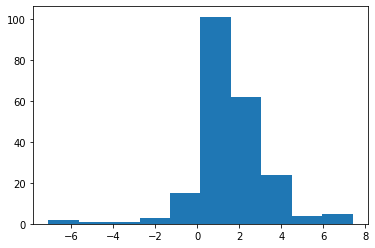

In [3]:
plt.hist(new_df['Female_Minus_Male'])

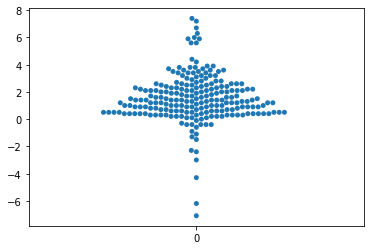

In [4]:
sns.swarmplot(data=new_df['Female_Minus_Male'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2231699beb8>,
 'caps': [<matplotlib.lines.Line2D at 0x223169ae8d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2231699bd68>],
 'medians': [<matplotlib.lines.Line2D at 0x223169aef60>],
 'fliers': [<matplotlib.lines.Line2D at 0x223169aeef0>],
 'means': []}

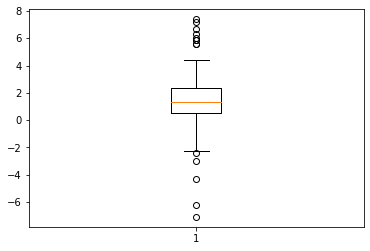

In [5]:
plt.boxplot(x= new_df['Female_Minus_Male'])

In [6]:
print("This histogram is negatively skewed whereas the previous histogram is normally distributed")

This histogram is negatively skewed whereas the previous histogram is normally distributed


In [7]:
print("Yes, there are multiple outliers.")

Yes, there are multiple outliers.


#### 2. Find the mean, median, variance, standard deviation, maximum, minimum, range, and Interquartile Range of this column.

In [8]:
np.mean(new_df['Female_Minus_Male'])

1.5096330275229353

In [9]:
np.median(new_df['Female_Minus_Male'])

1.3499999999999996

In [10]:
np.var(new_df['Female_Minus_Male'])

3.2246319754229447

In [11]:
np.std(new_df['Female_Minus_Male'])

1.7957260301680056

In [12]:
np.max(new_df['Female_Minus_Male'])

7.399999999999999

In [13]:
np.min(new_df['Female_Minus_Male'])

-7.100000000000001

In [14]:
#range
np.max(new_df['Female_Minus_Male']) - np.min(new_df['Female_Minus_Male'])

14.5

In [15]:
# Interquartile Range
new_df['Female_Minus_Male'].quantile(0.75) - new_df['Female_Minus_Male'].quantile(0.25)

1.875

#### 3. Which country has the longest lifespan for females compared to males? Which country has the longest lifespan for males compared to females? Which countries are outliers? What constitutes the cutoff for an outlier in this case?

In [16]:
# females compared to males
new_df[new_df['Female_Minus_Male'] ==np.max(new_df['Female_Minus_Male'])]

,Country/Territory,Average(Years),Male(Years),Female (Years),Continent,Female_Minus_Male
115,Lithuania,43.7,39.7,47.1,Europe,7.4


In [17]:
#males compared to females
new_df[new_df['Female_Minus_Male'] ==np.min(new_df['Female_Minus_Male'])]

,Country/Territory,Average(Years),Male(Years),Female (Years),Continent,Female_Minus_Male
205,United Arab Emirates,30.3,32.1,25.0,Asia,-7.1


In [18]:
#outliers
new_df[(new_df['Female_Minus_Male'] > (new_df['Female_Minus_Male'].quantile(0.75)+(1.5*1.875))) | (new_df['Female_Minus_Male'] <(new_df['Female_Minus_Male'].quantile(0.25)-(1.5*1.875)))]

,Country/Territory,Average(Years),Male(Years),Female (Years),Continent,Female_Minus_Male
15,Bahrain,32.3,33.8,29.5,Asia,-4.3
18,Belarus,40.0,37.1,43.1,Europe,6.0
60,Estonia,42.7,39.4,46.1,Europe,6.7
68,Georgia,38.1,35.3,40.9,Asia,5.6
69,Georgia,38.1,35.3,40.9,Europe,5.6
106,Kuwait,29.3,30.4,27.4,Asia,-3.0
109,Latvia,43.6,39.7,46.9,Europe,7.2
115,Lithuania,43.7,39.7,47.1,Europe,7.4
147,Oman,25.6,26.6,24.2,Asia,-2.4
158,Qatar,33.2,34.3,28.1,Asia,-6.2


In [19]:
#cutoff for top whisker
(new_df['Female_Minus_Male'].quantile(0.75)+(1.5*1.875))

5.1875

In [20]:
#cutoff for bottom whisker
(new_df['Female_Minus_Male'].quantile(0.25)-(1.5*1.875))

-2.3125

#### 4. Find the mean, median, and standard deviation of the data grouped by continent. Which continent has the highest absolute difference between its mean and median? What does the difference between mean and median say about the distribution of values for that continent?

In [21]:
new_df.groupby('Continent')['Female_Minus_Male'].median()


Continent
Africa           0.60
Asia             1.20
Europe           2.65
North America    1.10
Oceania          1.00
South America    1.50
Name: Female_Minus_Male, dtype: float64

In [22]:
new_df.groupby('Continent')['Female_Minus_Male'].mean()


Continent
Africa           0.798000
Asia             0.814583
Europe           3.003704
North America    1.406061
Oceania          1.028571
South America    1.658333
Name: Female_Minus_Male, dtype: float64

In [23]:
new_df.groupby('Continent')['Female_Minus_Male'].std()

Continent
Africa           0.685265
Asia             2.417577
Europe           1.654378
North America    1.398200
Oceania          0.863796
South America    0.862827
Name: Female_Minus_Male, dtype: float64

In [24]:
np.max(new_df.groupby('Continent')['Female_Minus_Male'].std())

2.4175765589614144

In [25]:
(new_df.groupby('Continent')['Female_Minus_Male'].mean()-new_df.groupby('Continent')['Female_Minus_Male'].median())**2

Continent
Africa           0.039204
Asia             0.148546
Europe           0.125106
North America    0.093673
Oceania          0.000816
South America    0.025069
Name: Female_Minus_Male, dtype: float64

In [26]:
np.max((new_df.groupby('Continent')['Female_Minus_Male'].mean()-new_df.groupby('Continent')['Female_Minus_Male'].median())**2)

0.14854600694444356

In [27]:
print("Asia has the highest absolute difference between its mean and median.The different says that its negative skewed where mean is smaller than median.")

Asia has the highest absolute difference between its mean and median.The different says that its negative skewed where mean is smaller than median.


#### 5. Plot a swarmplot and boxplot of the data grouped by continent.

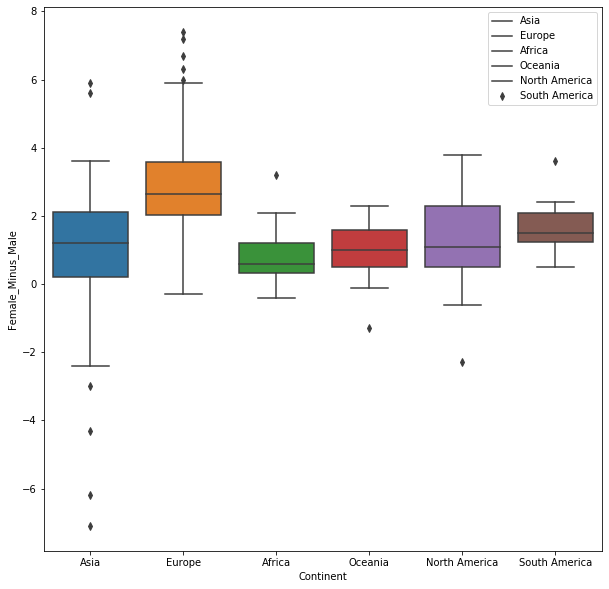

In [28]:
fig = plt.figure(figsize=(10,10))
sns.boxplot(x='Continent', y='Female_Minus_Male', data=new_df)
plt.gca().legend(new_df['Continent'].unique())

C:\Users\Nahin Imtiaz\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


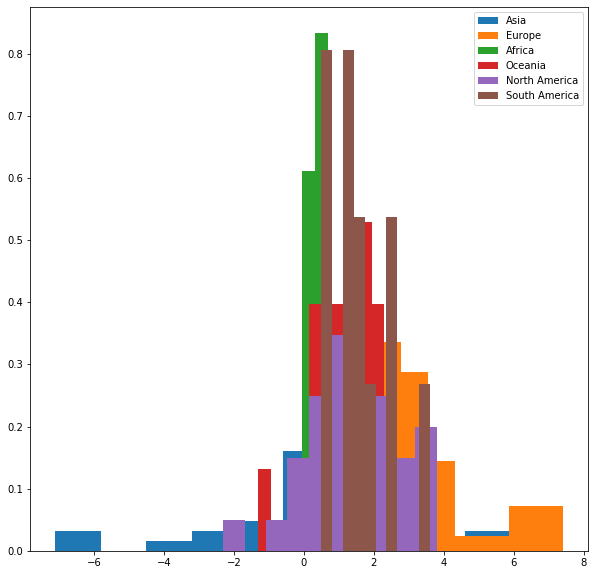

In [29]:
fig = plt.figure(figsize=(10,10))
for continent in new_df['Continent'].unique():
    plt.hist(new_df[new_df['Continent'] == continent]['Female_Minus_Male'], normed=True)
plt.gca().legend(new_df['Continent'].unique())

#### 6. Given your observations from the previous two questions, what may be a cause of why the continent with the largest spread is that way? Hint: Look at the outliers for that country.

In [30]:
print("From the boxplot,the asia continent has lots of bottom outliers as well as top outliers.but there are more bottom outliers than other continents which creates a negative skew and since most of the values of asia are bottom outlier,its on the far left. ")

From the boxplot,the asia continent has lots of bottom outliers as well as top outliers.but there are more bottom outliers than other continents which creates a negative skew and since most of the values of asia are bottom outlier,its on the far left. 


### 2. Answer Questions 1 through 10 from [here](https://www.kaggle.com/kashnitsky/a1-demo-pandas-and-uci-adult-dataset) below (please copy and paste each question into its own cell with answers below it).

In [31]:
#AdultDataSet
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')
df.columns = ['age', 'workingclass', 'fnlwgt', 'education', 'education-num', 'martial-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'salary']
df['salary'] = df['salary'].str.strip()
df['native-country'] = df['native-country'].str.strip()

In [32]:
df

,age,workingclass,fnlwgt,education,education-num,martial-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


#### 1. How many men and women (sex feature) are represented in this dataset?

In [33]:
df['sex'].value_counts()

 Male      21789
 Female    10771
Name: sex, dtype: int64

#### 2. What is the average age (age feature) of women?

In [34]:
df.groupby(df['sex'])['age'].mean()

sex
 Female    36.858230
 Male      39.433567
Name: age, dtype: float64

#### 3. What is the percentage of German citizens (native-country feature)?

In [35]:
df['native-country'].value_counts()

United-States                 29169
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [50]:
#germany = 137 & total = 32561

print("percentage of germany is",(137/32561)*100)

percentage of germany is 0.42074874850281013


#### 4-5. What are the mean and standard deviation of age for those who earn more than 50K per year (salary feature) and those who earn less than 50K per year?

In [37]:
#Mean
df.groupby(df['salary'])['age'].mean()

salary
<=50K    36.783648
>50K     44.249841
Name: age, dtype: float64

In [38]:
#Standard Deviation
df.groupby(df['salary'])['age'].std()

salary
<=50K    14.020365
>50K     10.519028
Name: age, dtype: float64

#### 6. Is it true that people who earn more than 50K have at least high school education? (education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters or Doctorate feature)

# I tried to use the given code in our class work.but for some reason its not working. Im confused how the "and" statesment works in python and not sure how to get values using ">50k"

In [39]:
df[(df['education-num'] <9) & (df['salary'] == '>50k')]

,age,workingclass,fnlwgt,education,education-num,martial-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary


#### 7. Display age statistics for each race (race feature) and each gender (sex feature). Use groupby() and describe(). Find the maximum age of men of Amer-Indian-Eskimo race.

In [40]:
df.groupby(df['sex'])['age'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,10771.0,36.858230,14.013697,17.0,25.0,35.0,46.0,90.0
Male,21789.0,39.433567,13.370937,17.0,29.0,38.0,48.0,90.0


In [41]:
df.groupby(df['race'])['age'].describe()

,count,mean,std,min,25%,50%,75%,max
race,,,,,,,,
Amer-Indian-Eskimo,311.0,37.173633,12.447130,17.0,28.0,35.0,45.5,82.0
Asian-Pac-Islander,1039.0,37.746872,12.825133,17.0,28.0,36.0,45.0,90.0
Black,3124.0,37.767926,12.759290,17.0,28.0,36.0,46.0,90.0
Other,271.0,33.457565,11.538865,17.0,25.0,31.0,41.0,77.0
White,27815.0,38.769872,13.782554,17.0,28.0,37.0,48.0,90.0


In [42]:
print("maximum  age of men of Amer-Indian-Eskimo race is 82.")

maximum  age of men of Amer-Indian-Eskimo race is 82.


#### 8. Among whom is the proportion of those who earn a lot (>50K) greater: married or single men (marital-status feature)? Consider as married those who have a marital-status starting with Married (Married-civ-spouse, Married-spouse-absent or Married-AF-spouse), the rest are considered bachelors.

In [51]:
df['martial-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: martial-status, dtype: int64

In [ ]:
print("the answer is married")

#### 9. What is the maximum number of hours a person works per week (hours-per-week feature)? How many people work such a number of hours, and what is the percentage of those who earn a lot (>50K) among them?

In [43]:
df.groupby(df['salary'])['hours-per-week'].describe()

,count,mean,std,min,25%,50%,75%,max
salary,,,,,,,,
<=50K,24719.0,38.840163,12.319242,1.0,35.0,40.0,40.0,99.0
>50K,7841.0,45.473026,11.012971,1.0,40.0,40.0,50.0,99.0


In [44]:
print("99 is the maximum number of hours a person works per week")

99 is the maximum number of hours a person works per week


In [45]:
df['hours-per-week'].value_counts()

40    15216
50     2819
45     1824
60     1475
35     1297
20     1224
30     1149
55      694
25      674
48      517
38      476
15      404
70      291
10      278
32      266
24      252
65      244
36      220
42      219
44      212
16      205
12      173
43      151
37      149
8       145
52      138
80      133
56       97
28       86
99       85
      ...  
19       14
64       14
51       13
85       13
68       12
98       11
11       11
63       10
78        8
29        7
77        6
59        5
31        5
96        5
67        4
91        3
76        3
81        3
73        2
89        2
97        2
88        2
86        2
61        2
95        2
92        1
94        1
87        1
74        1
82        1
Name: hours-per-week, Length: 94, dtype: int64

In [ ]:
print("85 people works 99 or maximum hours per week")

In [46]:
df['salary'].value_counts()

<=50K    24719
>50K      7841
Name: salary, dtype: int64

In [49]:
print((85/7841)*100," is the percentage of those who earn a lot (>50K) among them")

1.0840454023721464  is the percentage of those who earn a lot (>50K) among them


#### 10. Count the average time of work (hours-per-week) for those who earn a little and a lot (salary) for each country (native-country). What will these be for Japan?

#having same problem like no.6 .not sure how to seperate >50k and <=50k .below, I gave the the average for all countries without seperating two salaries.

In [57]:

df.groupby(df['native-country'])['hours-per-week'].mean()

native-country
?                             41.512864
Cambodia                      40.894737
Canada                        40.404959
China                         37.786667
Columbia                      39.067797
Cuba                          39.157895
Dominican-Republic            42.471429
Ecuador                       39.571429
El-Salvador                   36.792453
England                       41.833333
France                        45.068966
Germany                       41.014599
Greece                        44.241379
Guatemala                     39.234375
Haiti                         36.909091
Holand-Netherlands            40.000000
Honduras                      36.307692
Hong                          40.900000
Hungary                       35.615385
India                         41.530000
Iran                          43.976744
Ireland                       42.416667
Italy                         41.602740
Jamaica                       38.592593
Japan                    